In [1]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import re

# Descomprimir el archivo ZIP del dataset
zip_path = '/content/Casas_Dataset.zip'
extract_path = '/content/Data_Set/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verificar que se extrajo el contenido correctamente
os.listdir(extract_path)

# Definir las etiquetas posibles (descripciones)
labels = [
    'casa', 'edificio', 'escalera', 'grande', 'pequeña', 'mediana', 'dos pisos', 'tres pisos',
    'cuatro pisos', 'cinco pisos', 'seis pisos', 'siete pisos', 'ocho pisos', 'blanca', 'gris',
    'naranja', 'rosa', 'negra', 'beige', 'verde', 'roja', 'amarilla', 'cafe', 'azul', 'moderna',
    'puerta blanca', 'puerta negra', 'puerta cafe', 'puerta verde', 'puerta gris', 'ventana',
    'patio', 'sin patio', 'detalle verde', 'detalle naranja', 'detalle rosa', 'detalle azul', 'tienda'
]

# Crear un diccionario que mapea las etiquetas a índices
label_dict = {label: idx for idx, label in enumerate(labels)}

# Función para cargar imágenes y sus etiquetas binarias
def load_images_and_labels(image_folder, label_dict, target_size=(150, 150)):
    image_arrays = []
    image_labels = []

    # Recorrer todas las imágenes en el directorio
    for subdir, dirs, files in os.walk(image_folder):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(subdir, file)
                # Cargar la imagen
                img = load_img(image_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0  # Normalizar la imagen

                # Obtener las etiquetas de la imagen (del nombre del archivo o carpeta)
                labels_in_image = np.zeros(len(label_dict))
                labels_found = False
                for label in label_dict:
                    if re.search(r'\b' + re.escape(label) + r'\b', file.lower()):  # Buscar etiquetas completas en el nombre del archivo
                        labels_in_image[label_dict[label]] = 1
                        labels_found = True

                # Si no se encuentran etiquetas, asignar una etiqueta predeterminada para evitar vectores vacíos
                if not labels_found:
                    labels_in_image[label_dict['casa']] = 1

                image_arrays.append(img_array)
                image_labels.append(labels_in_image)

    return np.array(image_arrays), np.array(image_labels)

# Cargar las imágenes y etiquetas
images, image_labels = load_images_and_labels(extract_path, label_dict)

# Dividir en datos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(images, image_labels, test_size=0.2, random_state=42)

# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(label_dict), activation='sigmoid')  # Activación sigmoid para multietiqueta
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Ver el resumen del modelo
model.summary()

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=16
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,053,158 (72.68 MB)

 Trainable params: 19,053,158 (72.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5861 - loss: 0.3191 - val_accuracy: 1.0000 - val_loss: 5.7806e-10
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 7.1743e-11 - val_accuracy: 1.0000 - val_loss: 8.2276e-27
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 971ms/step - accuracy: 1.0000 - loss: 8.8497e-29 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0000e+0

Describe cómo es tu casa: edificio, blanca, detalle naranja, puerta roja, cinco pisos


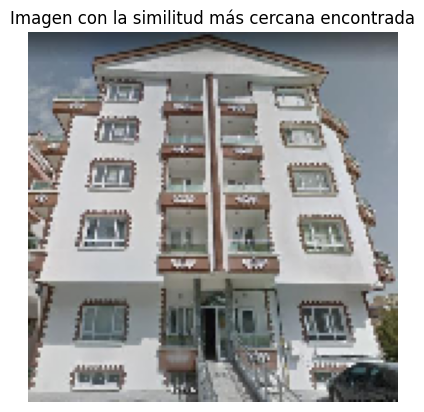

In [ ]:
# Función para convertir la descripción del usuario en un vector binario
def description_to_vector(description, label_dict):
    # Crear un vector binario de etiquetas
    description_vector = np.zeros(len(label_dict))

    # Convertir la descripción en un conjunto de palabras usando tokenización más robusta
    description_words = re.findall(r'\w+', description.lower())

    for word in description_words:
        if word in label_dict:
            description_vector[label_dict[word]] = 1  # Asignar peso normal a las etiquetas mencionadas

    return description_vector

# Función para mostrar la imagen más similar
def show_similar_image(user_description, label_dict, image_arrays, image_labels):
    # Convertir la descripción del usuario en un vector binario
    user_vector = description_to_vector(user_description, label_dict)

    # Calcular la similitud de coseno entre el vector del usuario y las etiquetas de las imágenes
    similarities = cosine_similarity([user_vector], image_labels)

    # Obtener el índice de la imagen más similar
    most_similar_index = np.argmax(similarities)

    # Mostrar la imagen más similar
    similar_image = image_arrays[most_similar_index]
    plt.imshow(similar_image)
    plt.axis('off')
    plt.title("Imagen con la similitud más cercana encontrada")
    plt.show()

# Pedir al usuario la descripción de su casa
user_description = input("Describe cómo es tu casa: ")

# Mostrar la imagen más similar
show_similar_image(user_description, label_dict, X_val, y_val)